Требуется классифицировать список абонентов телефонного оператора по переменной Churn, используя нейронную сеть. Набор данных содержит информацию о 3333 абонентах. Часть данных будет использоваться для обучения, часть для тестирования. Файл содержит 21 переменную для каждого абонента.
<table>
<thead>
<tr>
<th>Название</th>
<th>Описание</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>State</strong></td>
<td>Буквенный код штата</td>
</tr>
<tr>
<td><strong>Account length</strong></td>
<td>Как долго клиент обслуживается компанией</td>
</tr>
<tr>
<td><strong>Area code</strong></td>
<td>Префикс номера телефона</td>
</tr>
<tr>
<td><strong>Phone number</strong></td>
<td>Номер телефона</td>
</tr>
<tr>
<td><strong>International plan</strong></td>
<td>Международный роуминг (подключен/не подключен)</td>
</tr>
<tr>
<td><strong>Voice mail plan</strong></td>
<td>Голосовая почта (подключена/не подключена)</td>
</tr>
<tr>
<td><strong>Number vmail messages</strong></td>
<td>Количество голосовых сообщений</td>
</tr>
<tr>
<td><strong>Total day minutes</strong></td>
<td>Общая длительность разговоров днем</td>
</tr>
<tr>
<td><strong>Total day calls</strong></td>
<td>Общее количество звонков днем</td>
</tr>
<tr>
<td><strong>Total day charge</strong></td>
<td>Общая сумма оплаты за услуги днем</td>
</tr>
<tr>
<td><strong>Total eve minutes</strong></td>
<td>Общая длительность разговоров вечером</td>
</tr>
<tr>
<td><strong>Total eve calls</strong></td>
<td>Общее количество звонков вечером</td>
</tr>
<tr>
<td><strong>Total eve charge</strong></td>
<td>Общая сумма оплаты за услуги вечером</td>
</tr>
<tr>
<td><strong>Total night minutes</strong></td>
<td>Общая длительность разговоров ночью</td>
</tr>
<tr>
<td><strong>Total night calls</strong></td>
<td>Общее количество звонков ночью</td>
</tr>
<tr>
<td><strong>Total night charge</strong></td>
<td>Общая сумма оплаты за услуги ночью</td>
</tr>
<tr>
<td><strong>Total intl minutes</strong></td>
<td>Общая длительность международных разговоров</td>
</tr>
<tr>
<td><strong>Total intl calls</strong></td>
<td>Общее количество международных разговоров</td>
</tr>
<tr>
<td><strong>Total intl charge</strong></td>
<td>Общая сумма оплаты за международные разговоры</td>
</tr>
<tr>
<td><strong>Customer service calls</strong></td>
<td>Число обращений в сервисный центр</td>
</tr>
<tr>
<td><strong>Churn</strong></td>
<td>Признак оттока (потеря клиента/клиент пока остаётся)</td>
</tr>
</tbody>
</table>

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

Приведение данных к числовому виду и удаление ненужных при обучении данных

In [103]:
df = pd.read_csv('telecom_churn.csv')
df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['state'] = pd.factorize(df['state'])[0]
df['churn'] = df['churn'].astype('int')
y = df['churn']
df.drop(['churn', 'phone number', 'area code'], axis=1, inplace=True)
df = df/df.max()

Разделение данных на обучающую и тестовую выборки

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=17)

Формирование эталонных выходных векторов для нейронной сети

In [105]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Определение архитектуры нейронной сети

In [108]:
model = Sequential([
    Dense(14, input_shape=(18,), activation="relu"),
    Dense(10, activation="relu"),
    Dense(7, activation="relu"),
    Dense(4, activation="relu"),
    Dense(2, activation="softmax")
])

Компиляция модели нейронной сети

In [109]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Обучение нейронной сети

In [110]:
EPOCHS = 150
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS)

Train on 2666 samples, validate on 667 samples
Epoch 1/150
2666/2666 [==============================] - 5s 2ms/step - loss: 0.5554 - accuracy: 0.8175 - val_loss: 0.3887 - val_accuracy: 0.8726
Epoch 2/150
2666/2666 [==============================] - 1s 230us/step - loss: 0.4247 - accuracy: 0.8507 - val_loss: 0.3769 - val_accuracy: 0.8726
Epoch 3/150
2666/2666 [==============================] - 1s 213us/step - loss: 0.4111 - accuracy: 0.8507 - val_loss: 0.3609 - val_accuracy: 0.8726
Epoch 4/150
2666/2666 [==============================] - 1s 231us/step - loss: 0.3969 - accuracy: 0.8507 - val_loss: 0.3484 - val_accuracy: 0.8726
Epoch 5/150
2666/2666 [==============================] - 1s 233us/step - loss: 0.3868 - accuracy: 0.8507 - val_loss: 0.3413 - val_accuracy: 0.8726
Epoch 6/150
2666/2666 [==============================] - 1s 232us/step - loss: 0.3782 - accuracy: 0.8507 - val_loss: 0.3447 - val_accuracy: 0.8726
Epoch 7/150
2666/2666 [==============================] - 1s 251us/step - 

2666/2666 [==============================] - 1s 225us/step - loss: 0.2235 - accuracy: 0.9224 - val_loss: 0.2177 - val_accuracy: 0.9220
Epoch 56/150
2666/2666 [==============================] - 1s 212us/step - loss: 0.2264 - accuracy: 0.9182 - val_loss: 0.2043 - val_accuracy: 0.9325
Epoch 57/150
2666/2666 [==============================] - 1s 218us/step - loss: 0.2216 - accuracy: 0.9182 - val_loss: 0.2301 - val_accuracy: 0.9085
Epoch 58/150
2666/2666 [==============================] - 1s 203us/step - loss: 0.2242 - accuracy: 0.9212 - val_loss: 0.2055 - val_accuracy: 0.9280
Epoch 59/150
2666/2666 [==============================] - 1s 214us/step - loss: 0.2191 - accuracy: 0.9216 - val_loss: 0.2036 - val_accuracy: 0.9295
Epoch 60/150
2666/2666 [==============================] - 1s 198us/step - loss: 0.2187 - accuracy: 0.9231 - val_loss: 0.2150 - val_accuracy: 0.9160
Epoch 61/150
2666/2666 [==============================] - 1s 197us/step - loss: 0.2179 - accuracy: 0.9216 - val_loss: 0.2036 

2666/2666 [==============================] - 1s 198us/step - loss: 0.1803 - accuracy: 0.9437 - val_loss: 0.1700 - val_accuracy: 0.9490
Epoch 111/150
2666/2666 [==============================] - 1s 195us/step - loss: 0.1796 - accuracy: 0.9434 - val_loss: 0.1758 - val_accuracy: 0.9430
Epoch 112/150
2666/2666 [==============================] - 1s 195us/step - loss: 0.1809 - accuracy: 0.9426 - val_loss: 0.1732 - val_accuracy: 0.9490
Epoch 113/150
2666/2666 [==============================] - 1s 195us/step - loss: 0.1799 - accuracy: 0.9415 - val_loss: 0.1727 - val_accuracy: 0.9475
Epoch 114/150
2666/2666 [==============================] - 1s 196us/step - loss: 0.1775 - accuracy: 0.9445 - val_loss: 0.1727 - val_accuracy: 0.9565
Epoch 115/150
2666/2666 [==============================] - 1s 263us/step - loss: 0.1772 - accuracy: 0.9441 - val_loss: 0.1708 - val_accuracy: 0.9505
Epoch 116/150
2666/2666 [==============================] - 1s 310us/step - loss: 0.1754 - accuracy: 0.9445 - val_loss: 0

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       582
           1       0.89      0.75      0.82        85

    accuracy                           0.96       667
   macro avg       0.93      0.87      0.90       667
weighted avg       0.96      0.96      0.95       667



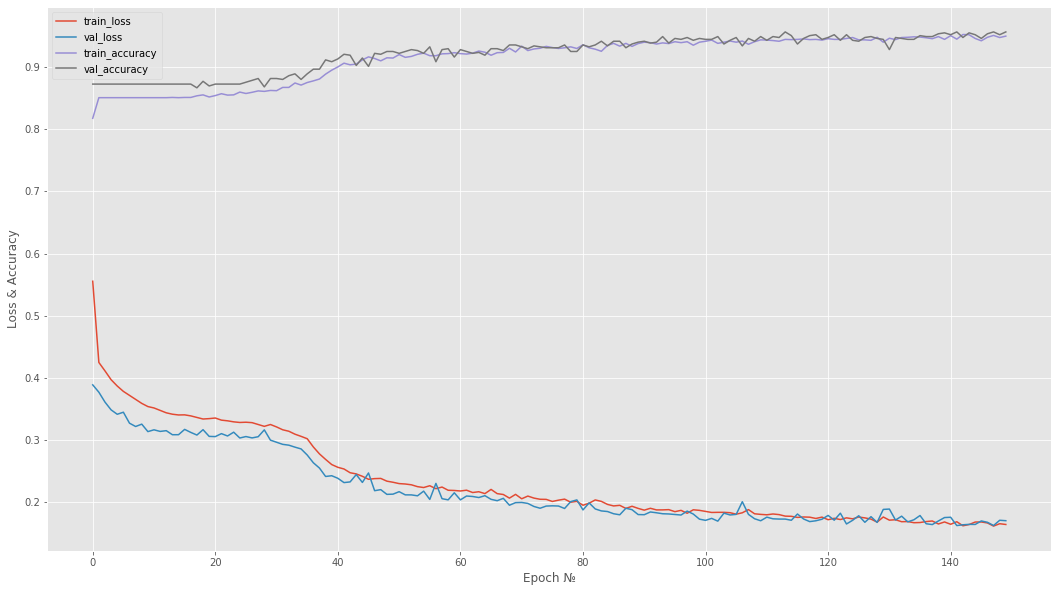

In [111]:
predictions = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))
%matplotlib inline

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(18, 10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_accuracy")
plt.plot(N, H.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch №")
plt.ylabel("Loss & Accuracy")
plt.legend()